In [1]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import shared

ve_or_ju = "ve"

In [2]:
running_order = pd.read_csv(f'data/running_order_j2019_{ve_or_ju}.tsv', delimiter="\t")
display(running_order.shape)

(6759, 7)

In [3]:
running_order["leg_nro"] = running_order["leg"]
running_order["orig_name"] = running_order["name"]
running_order["name"] = running_order["name"].str.lower()

In [4]:
running_order.head()

,team_id,team,team_base_name,team_country,leg,leg_dist,name,leg_nro,orig_name
0,1,Stora Tuna OK 1,Stora Tuna OK,SWE,1,6.0,tilda östberg,1,Tilda Östberg
1,1,Stora Tuna OK 1,Stora Tuna OK,SWE,2,5.7,magdalena olsson,2,Magdalena Olsson
2,1,Stora Tuna OK 1,Stora Tuna OK,SWE,3,7.3,julia jakob,3,Julia Jakob
3,1,Stora Tuna OK 1,Stora Tuna OK,SWE,4,7.9,tove alexandersson,4,Tove Alexandersson
4,2,Göteborg Majorna OK 1,Göteborg Majorna OK,SWE,1,6.0,amanda hansson,1,Amanda Hansson


In [5]:
predictions_and_history = pd.read_csv(f"data/simple_preds_for_runners_with_history_14062019_{ve_or_ju}.csv", delimiter="\t")
display(predictions_and_history.shape)
predictions_and_history.head()

(14424, 12)

,Unnamed: 0,mean_team_id,num_valid_times,mean_pace,stdev,log_stdev,prior_mean,prior_log_std,predicted_log_pace_mean,predicted_log_pace_std,name,teams
0,0,7.0,3,6.649,0.404,0.0598,7.0016,0.1016,1.8926,0.0598,anna mårsell,STORA TUNA OK
1,1,27.5,6,7.096,0.609,0.0886,6.5398,0.1236,1.9556,0.0886,magdalena olsson,IFK MORAS OK;STORA TUNA OK
2,2,3.0,1,5.944,0.000,0.0000,6.8713,0.1366,1.7824,0.0000,julia jakob,STORA TUNA OK
3,3,8.5,6,6.077,0.362,0.0586,6.6244,0.1289,1.8027,0.0586,tove alexandersson,STORA TUNA OK
4,4,61.0,3,7.328,0.845,0.1119,7.7418,0.1145,1.9854,0.1119,lisa holer,EKSJÖ SOK;GÖTEBORG MAJORNA OK


In [6]:

predictions_and_history["num_runs"] = predictions_and_history["num_valid_times"]
no_history_row = pd.DataFrame([[0, 0, 0]], columns=["predicted_log_pace_mean", "predicted_log_pace_std", "num_valid_times"])
def get_history_and_preds(running_order_row):
    history_row = shared.get_matching_history_row_for_runner(running_order_row, predictions_and_history, no_history_row)
    #print(f"estimate_row log_means {history_row.log_means} {history_row.log_stdevs}")
    pred_log_mean = history_row.predicted_log_pace_mean.values[0]
    pred_log_std = history_row.predicted_log_pace_std.values[0]
    num_valid_times = history_row.num_valid_times.values[0]
    return pd.Series({"pred_log_mean": pred_log_mean, "pred_log_std": pred_log_std, "num_valid_times": num_valid_times})

history_and_preds = running_order.apply(lambda row: get_history_and_preds(row), axis=1)
running_order = running_order.assign(num_runs = history_and_preds.num_valid_times)
running_order = running_order.assign(pred_log_mean = history_and_preds.pred_log_mean)
running_order = running_order.assign(pred_log_std = history_and_preds.pred_log_std)



Found 1 history with switched name evely kaasiku 
Found 1 history with switched name johanna hulkkonen 
Found 1 history with switched name miia niittynen 
Found 1 history with switched name svetlana mironova 
Found 1 history with switched name karoliina ukskoski 
Found 1 history with switched name marjo taanila 
Found 1 history with switched name ulrika uotila 
Found 1 history with switched name zhanalova barbora 
Found 1 history with switched name nymark tora 
Found 1 history with switched name rafols ona 
Found 1 history with switched name boman monica 
Found 1 history with switched name oikarinen anni 
name 'sanna timonen' team_name 'MAASOTAKOULU LPR'
by_name 0 by_name_and_colon 5 runners 2
Duplicate runner       Unnamed: 0  mean_team_id  num_valid_times  mean_pace  stdev  log_stdev  \
7350        7350         501.0                1     13.403    0.0        0.0   
7353        7353         777.0                1     10.631    0.0        0.0   

      prior_mean  prior_log_std  predic

In [7]:
history_and_preds.head()

,pred_log_mean,pred_log_std,num_valid_times
0,1.8857,0.0000,1.0
1,1.9556,0.0886,6.0
2,1.7824,0.0000,1.0
3,1.8027,0.0586,6.0
4,2.0053,0.0358,2.0


In [8]:

(top_countries, top_first_names) = shared.read_persisted_dummy_column_values(ve_or_ju)

In [9]:
features = shared.preprocess_features(running_order, top_countries, ve_or_ju)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6759 entries, 0 to 6758
Data columns (total 12 columns):
team_id           6759 non-null int64
team              6759 non-null object
team_base_name    6759 non-null object
team_country      6759 non-null object
leg               6759 non-null int64
leg_dist          6759 non-null float64
name              6759 non-null object
leg_nro           6759 non-null int64
orig_name         6759 non-null object
num_runs          6759 non-null float64
pred_log_mean     6691 non-null float64
pred_log_std      6691 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 633.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 3 columns):
first_name           930 non-null object
fn_pace_class        931 non-null int64
fn_pace_std_class    931 non-null int64
dtypes: int64(2), object(1)
memory usage: 21.9+ KB


None

[]

In [10]:
features.info()

<class 'pandas.core.sparse.frame.SparseDataFrame'>
RangeIndex: 6759 entries, 0 to 6758
Data columns (total 40 columns):
team_id                  6759 non-null Sparse[int64, nan]
team_id_log10            6759 non-null Sparse[float64, nan]
team_id_square           6759 non-null Sparse[int64, nan]
leg_1                    6759 non-null Sparse[uint8, 0]
leg_2                    6759 non-null Sparse[uint8, 0]
leg_3                    6759 non-null Sparse[uint8, 0]
leg_4                    6759 non-null Sparse[uint8, 0]
c_EST                    6759 non-null Sparse[uint8, 0]
c_FIN                    6759 non-null Sparse[uint8, 0]
c_GBR                    6759 non-null Sparse[uint8, 0]
c_LAT                    6759 non-null Sparse[uint8, 0]
c_NOR                    6759 non-null Sparse[uint8, 0]
c_OTHER                  6759 non-null Sparse[uint8, 0]
c_RUS                    6759 non-null Sparse[uint8, 0]
c_SUI                    6759 non-null Sparse[uint8, 0]
c_SWE                    6759 no

In [11]:

#gbr_sd_estimate = shared.predict_without_history(features)
gbr_sd_estimate = shared.predict_without_history(features, ve_or_ju)

,log_q_low,predicted,log_q_high,log_std
0,1.881,6.512,1.979,0.049
1,1.765,6.993,1.962,0.098
2,1.799,6.569,2.019,0.110
3,1.792,6.291,1.974,0.091
4,1.881,7.532,2.036,0.078
5,1.815,6.548,1.959,0.072
6,1.784,6.186,2.029,0.123
7,1.855,6.738,2.050,0.097
8,1.875,6.891,2.003,0.064
9,1.808,7.057,2.008,0.100


0.16731765797772105

In [12]:
running_order["predicted"] = gbr_sd_estimate["predicted"]
running_order["log_q_low"] = gbr_sd_estimate["log_q_low"]
running_order["log_q_high"] = gbr_sd_estimate["log_q_high"]
running_order["log_std"] = gbr_sd_estimate["log_std"]


In [13]:
running_order.head()

,team_id,team,team_base_name,team_country,leg,leg_dist,name,leg_nro,orig_name,num_runs,pred_log_mean,pred_log_std,predicted,log_q_low,log_q_high,log_std
0,1,Stora Tuna OK 1,Stora Tuna OK,SWE,1,6.0,tilda östberg,1,Tilda Östberg,1.0,1.8857,0.0000,6.511986,1.881337,1.978520,0.048591
1,1,Stora Tuna OK 1,Stora Tuna OK,SWE,2,5.7,magdalena olsson,2,Magdalena Olsson,6.0,1.9556,0.0886,6.992522,1.765439,1.961637,0.098099
2,1,Stora Tuna OK 1,Stora Tuna OK,SWE,3,7.3,julia jakob,3,Julia Jakob,1.0,1.7824,0.0000,6.569075,1.798748,2.018901,0.110076
3,1,Stora Tuna OK 1,Stora Tuna OK,SWE,4,7.9,tove alexandersson,4,Tove Alexandersson,6.0,1.8027,0.0586,6.290935,1.791712,1.973971,0.091129
4,2,Göteborg Majorna OK 1,Göteborg Majorna OK,SWE,1,6.0,amanda hansson,1,Amanda Hansson,2.0,2.0053,0.0358,7.531656,1.880709,2.035837,0.077564


In [14]:
running_order["log_std"].describe(percentiles=[0.01, 0.05, .25, .5, .75, .95, .99])

count    6759.000000
mean        0.167318
std         0.048304
min        -0.060067
1%          0.011062
5%          0.053884
25%         0.147355
50%         0.173667
75%         0.197361
95%         0.229512
99%         0.253692
max         0.319118
Name: log_std, dtype: float64

In [15]:
running_order["log_std_fixed"] = running_order["log_std"]
#running_order["log_std_fixed"] = np.clip(running_order["log_std"], 0.1, 0.5)
#running_order["log_std"].values[running_order["log_std"].values < 0] = 0.1

In [16]:
#def select_final_ind_preds(row):
#    return pd.Series({"pred_log_mean": pred_log_mean, "pred_log_std": pred_log_std, "num_valid_times": num_valid_times})
    
    
#final_ind_preds = running_order.apply(lambda row: select_final_ind_preds(row), axis=1)

running_order["final_pace_mean"] = np.log(running_order["predicted"])
running_order["final_pace_std"] = running_order["log_std"]
use_predicted_mean = running_order["num_runs"].values >= 1
running_order["final_pace_mean"].values[use_predicted_mean] = running_order["pred_log_mean"].values[use_predicted_mean]
use_predicted_std = running_order["num_runs"].values >= 4
running_order["final_pace_std"].values[use_predicted_std] = running_order["pred_log_std"].values[use_predicted_std]

# remove extremes from unknown runners predictions
unknown_runners = running_order["num_runs"].values < 1
running_order["final_pace_mean"].values[unknown_runners] = np.clip(running_order["final_pace_mean"].values[unknown_runners], np.log(7), np.log(15))
running_order["final_pace_std"].values[unknown_runners] = np.clip(running_order["final_pace_std"].values[unknown_runners], np.log(1.2), np.log(1.5))

# remove extremes from all runners
running_order["final_pace_mean"] = np.clip(running_order["final_pace_mean"].values, np.log(5.6), np.log(18))
running_order["final_pace_std"] = np.clip(running_order["final_pace_std"], np.log(1.07), np.log(1.6))


running_order.head().round(3)


,team_id,team,team_base_name,team_country,leg,leg_dist,name,leg_nro,orig_name,num_runs,pred_log_mean,pred_log_std,predicted,log_q_low,log_q_high,log_std,log_std_fixed,final_pace_mean,final_pace_std
0,1,Stora Tuna OK 1,Stora Tuna OK,SWE,1,6.0,tilda östberg,1,Tilda Östberg,1.0,1.886,0.000,6.512,1.881,1.979,0.049,0.049,1.886,0.068
1,1,Stora Tuna OK 1,Stora Tuna OK,SWE,2,5.7,magdalena olsson,2,Magdalena Olsson,6.0,1.956,0.089,6.993,1.765,1.962,0.098,0.098,1.956,0.089
2,1,Stora Tuna OK 1,Stora Tuna OK,SWE,3,7.3,julia jakob,3,Julia Jakob,1.0,1.782,0.000,6.569,1.799,2.019,0.110,0.110,1.782,0.110
3,1,Stora Tuna OK 1,Stora Tuna OK,SWE,4,7.9,tove alexandersson,4,Tove Alexandersson,6.0,1.803,0.059,6.291,1.792,1.974,0.091,0.091,1.803,0.068
4,2,Göteborg Majorna OK 1,Göteborg Majorna OK,SWE,1,6.0,amanda hansson,1,Amanda Hansson,2.0,2.005,0.036,7.532,1.881,2.036,0.078,0.078,2.005,0.078


In [17]:
np.exp(running_order[["final_pace_mean", "final_pace_std"]]).describe(percentiles=[0.01, 0.02, 0.05, 0.1, .25, .5, .75, .9, .95, .99])


,final_pace_mean,final_pace_std
count,6759.000000,6759.000000
mean,11.634812,1.170804
std,2.608744,0.058236
min,5.872615,1.070000
1%,6.832960,1.070000
2%,7.033609,1.070000
5%,7.545037,1.070000
10%,8.208088,1.082399
25%,9.637387,1.121908
50%,11.527091,1.185949


In [18]:
running_order.to_csv(f"data/running_order_2019_with_estimates_{ve_or_ju}.tsv", "\t")

In [19]:
running_order[
    ['num_runs', 'pred_log_mean', "pred_log_std", "predicted", "log_std_fixed", "final_pace_mean", "final_pace_std"]
].groupby('num_runs').agg(["mean"]).round(2)



,pred_log_mean,pred_log_std,predicted,log_std_fixed,final_pace_mean,final_pace_std
,mean,mean,mean,mean,mean,mean
num_runs,,,,,,
0.0,0.00,0.00,12.51,0.16,2.49,0.20
1.0,2.46,0.00,12.36,0.18,2.46,0.18
2.0,2.46,0.07,11.86,0.17,2.45,0.18
3.0,2.44,0.10,11.85,0.16,2.43,0.17
4.0,2.39,0.10,11.54,0.16,2.39,0.11
5.0,2.38,0.11,11.36,0.17,2.38,0.11
6.0,2.35,0.11,10.96,0.17,2.35,0.11
7.0,2.35,0.11,10.98,0.16,2.35,0.11


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
sns.scatterplot(x="team_id", y=np.exp(running_order.final_pace_mean), hue="num_runs", data=running_order)


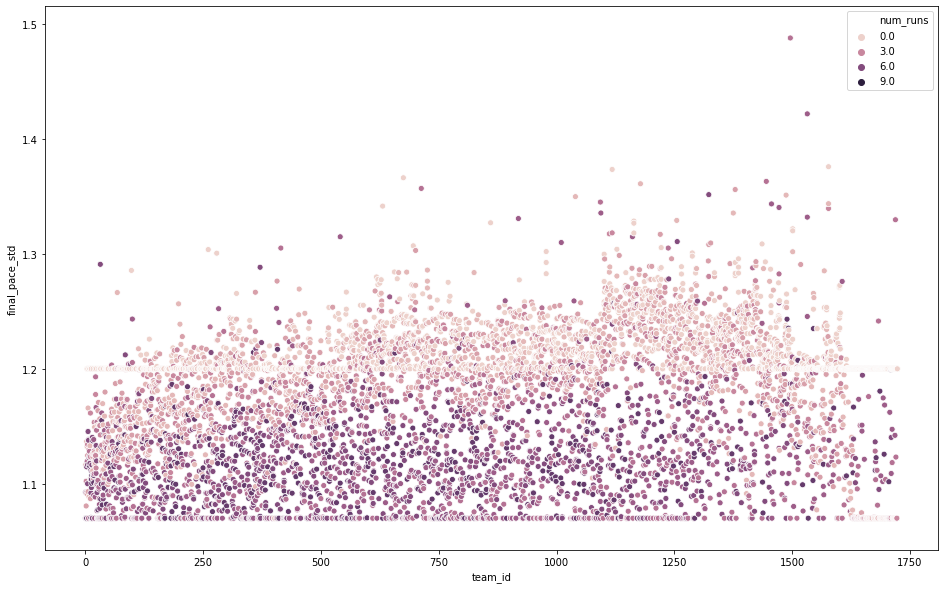

In [21]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x="team_id", y=np.exp(running_order.final_pace_std), hue="num_runs", data=running_order)
